In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score,StratifiedKFold
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [82]:
df=pd.read_csv('c:/Users/hcwan/Desktop/titanic kaggle/train.csv')
df_t=pd.read_csv('c:/Users/hcwan/Desktop/titanic kaggle/test.csv')
df_t.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [83]:
df_t.info()
print(df_t.isnull().sum(axis=0))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [84]:
df_tt=df_t.dropna(axis=1,thresh=300)
df_tt['Age']=df_tt['Age'].fillna(df['Age'].mean(axis=0))
df_tt['Fare']=df_tt['Fare'].fillna(df_tt['Fare'].mean(axis=0))
df_tt['Embarked']=df_tt['Embarked'].fillna(df['Embarked'].value_counts(dropna=True).idxmax())

df_tt.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


C:\Users\hcwan\AppData\Local\Temp\ipykernel_10404\298261124.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tt['Age']=df_tt['Age'].fillna(df['Age'].mean(axis=0))
C:\Users\hcwan\AppData\Local\Temp\ipykernel_10404\298261124.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tt['Fare']=df_tt['Fare'].fillna(df_tt['Fare'].mean(axis=0))
C:\Users\hcwan\AppData\Local\Temp\ipykernel_10404\298261124.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [4]:
df_1=df.dropna(axis=1,thresh=500)#Null 값 많은 열 삭제 여기서는 Cabin
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [62]:
df_1['Age']=df['Age'].fillna(df['Age'].mean(axis=0))
df_1['Embarked']=df['Embarked'].fillna(df['Embarked'].value_counts(dropna=True).idxmax())
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


C:\Users\hcwan\AppData\Local\Temp\ipykernel_10404\1991712469.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Age']=df['Age'].fillna(df['Age'].mean(axis=0))
C:\Users\hcwan\AppData\Local\Temp\ipykernel_10404\1991712469.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Embarked']=df['Embarked'].fillna(df['Embarked'].value_counts(dropna=True).idxmax())


In [87]:
df_2=df_1.set_index('PassengerId')
df_2=df_2.iloc[:,[0,1,3,4,5,6,8,9]]
# df_2.head()
df_t2=df_tt.set_index('PassengerId')
df_t2=df_t2.iloc[:,[0,2,3,4,5,7,8,]]
df_t2.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,male,34.5,0,0,7.8292,Q
893,3,female,47.0,1,0,7.0000,S
894,2,male,62.0,0,0,9.6875,Q
895,3,male,27.0,0,0,8.6625,S
896,3,female,22.0,1,1,12.2875,S


In [96]:
# pd.isnull(df_t2).value_counts()
df_2.replace(['female','male'],[0,1],inplace=True)
df_2.replace(['S','C','Q'],[1,2,3],inplace=True)
# df_2.head()
df_t2.replace(['female','male'],[0,1],inplace=True)
df_t2.replace(['S','C','Q'],[1,2,3],inplace=True)
df_t2.head()
 

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,1,34.5,0,0,7.8292,3
893,3,0,47.0,1,0,7.0000,1
894,2,1,62.0,0,0,9.6875,3
895,3,1,27.0,0,0,8.6625,1
896,3,0,22.0,1,1,12.2875,1


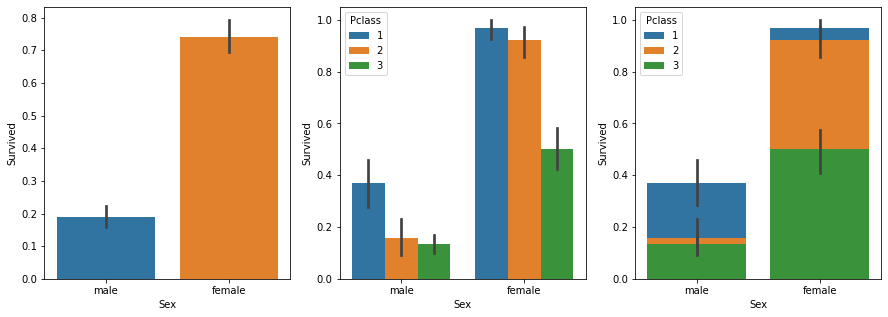

In [66]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

sns.barplot(x='Sex', y='Survived', data=df_2, ax=ax1)

sns.barplot(x='Sex', y='Survived', data=df_2,hue='Pclass', ax=ax2)

sns.barplot(x='Sex', y='Survived', data=df_2,hue='Pclass',
            dodge=False, ax=ax3)

plt.show()

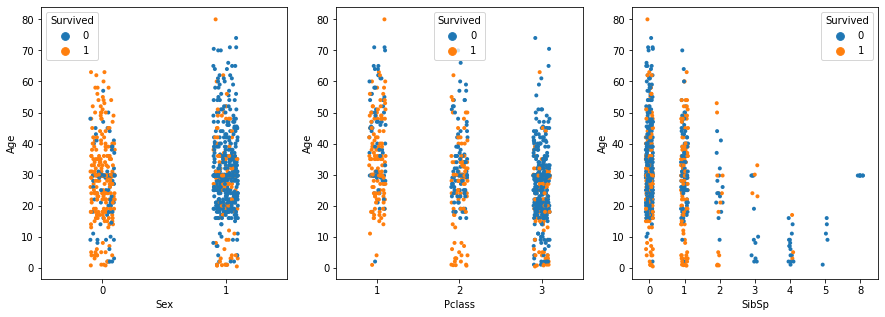

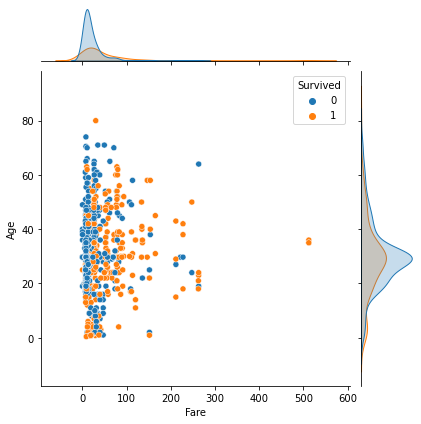

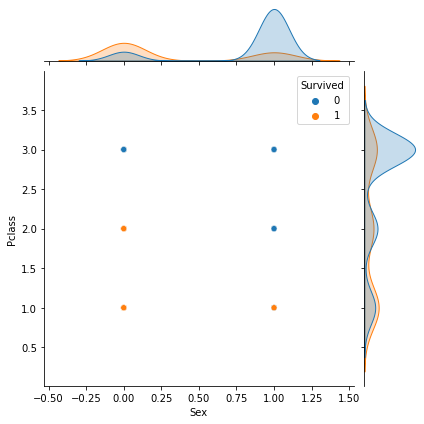

In [72]:
fig=plt.figure(figsize=(15,5))
# fig1=plt.figure(figsize=(15,5))

ax1=fig.add_subplot(1,3,1)
ax2=fig.add_subplot(1,3,2)
ax3=fig.add_subplot(1,3,3)

# axf1=fig1.add_subplot(1,2,1)
# axf2=fig1.add_subplot(1,2,2)

# sns.swarmplot(x='Pclass',y='Age',data=df_2,ax=ax2,size=4,hue='Survived')
sns.stripplot(x='Sex',y='Age',data=df_2,ax=ax1,size=4,hue='Survived')
sns.stripplot(x='Pclass',y='Age',data=df_2,ax=ax2,size=4,hue='Survived')
sns.stripplot(x='SibSp',y='Age',data=df_2,ax=ax3,size=4,hue='Survived')
sns.jointplot(x='Fare',y='Age',data=df_2,hue='Survived')
# sns.jointplot(x='Sex',y='Pclass',data=df_2,hue='Survived')
plt.show()

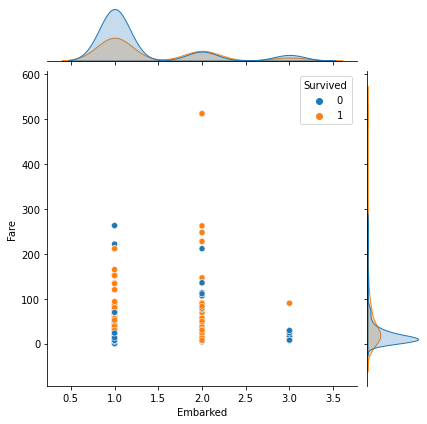

In [97]:
df_2.replace(['female','male'],[0,1],inplace=True)
df_2.replace(['S','C','Q'],[1,2,3],inplace=True)
df_2.head()
sns.jointplot(x='Embarked',y='Fare',data=df_2,hue='Survived')

In [98]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
import numpy as np
X_data=df_2[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']].to_numpy()
X_tdata=df_t2[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']].to_numpy()
y_target=df_2['Survived'].to_numpy()
print(X_tdata[:5])
# print(y_target[:5])


[[ 3.      1.     34.5     0.      0.      7.8292  3.    ]
 [ 3.      0.     47.      1.      0.      7.      1.    ]
 [ 2.      1.     62.      0.      0.      9.6875  3.    ]
 [ 3.      1.     27.      0.      0.      8.6625  1.    ]
 [ 3.      0.     22.      1.      1.     12.2875  1.    ]]


In [99]:
X_train, X_test,train_target,test_target= train_test_split(X_data,y_target, test_size = 0.25)
print(X_train.shape, X_test.shape)
ss=StandardScaler()
ss.fit(X_train)#훈련세트 테스트 세트 분활 및 데이터 값 스탠다드 스케일로 변형
finaltest=ss.transform(X_tdata)
train_scaled=ss.transform(X_train)
test_scaled=ss.transform(X_test)
finaltest.shape


(668, 7) (223, 7)


(418, 7)

In [100]:
# params={'min_impurity_decrease':np.arange(0.0001,0.001,0.0001),
#         'max_depth':range(5,20,1),
#         'min_samples_split':range(2,100,10)}#다양한 하이퍼파라미터 값을 정해주어 해당 값들마다 달라지는 최적의 값에 대한 모델을 찾을수 있고 그 최적값을 내는 하이퍼파라미터도 도출할수 있음
# gs=GridSearchCV(DecisionTreeClassifier(random_state=42),params,n_jobs=-1)
# gs.fit(train_input,train_target)
# print(gs.best_params_)
from scipy.stats import uniform,randint

params={'min_impurity_decrease':np.arange(0.0001,0.001,0.0001),
        'max_depth':range(5,30,1),
        'min_samples_split':range(2,100,10)}
# params={'min_impurity_decrease':uniform(0.0001,0.001),
#         'max_depth':randint(20,55),
#         'min_samples_split':randint(2,30),
#         'min_samples_leaf':randint(1,30)}
# from sklearn.model_selection import RandomizedSearchCV
# rs=RandomizedSearchCV(DecisionTreeClassifier(splitter='random'),params,n_iter=500,n_jobs=-1)
# rs.fit(train_scaled,train_target)
gs=GridSearchCV(DecisionTreeClassifier(),params,n_jobs=-1)
gs.fit(train_scaled,train_target)
dt=gs.best_estimator_
print(dt.score(train_scaled,train_target))
print(gs.cv_results_['mean_test_score'])
# best_index=np.argmax(rs.cv_results_['mean_test_score'])
# dt=rs.best_estimator_
# print(rs.best_params_)
print(np.max(gs.cv_results_['mean_test_score']))
print('Pclass','Sex','Age','SibSp','Parch','Fare','Embarked')
print(dt.feature_importances_)


0.9026946107784432
[0.83387947 0.83984962 0.83387947 ... 0.82489058 0.79791269 0.79490517]
0.8428571428571429
Pclass Sex Age SibSp Parch Fare Embarked
[0.13610796 0.4474964  0.18450917 0.01248305 0.01806826 0.18508527
 0.01624989]


훈련세트: 0.9026946107784432
테스트 세트: 0.7623318385650224


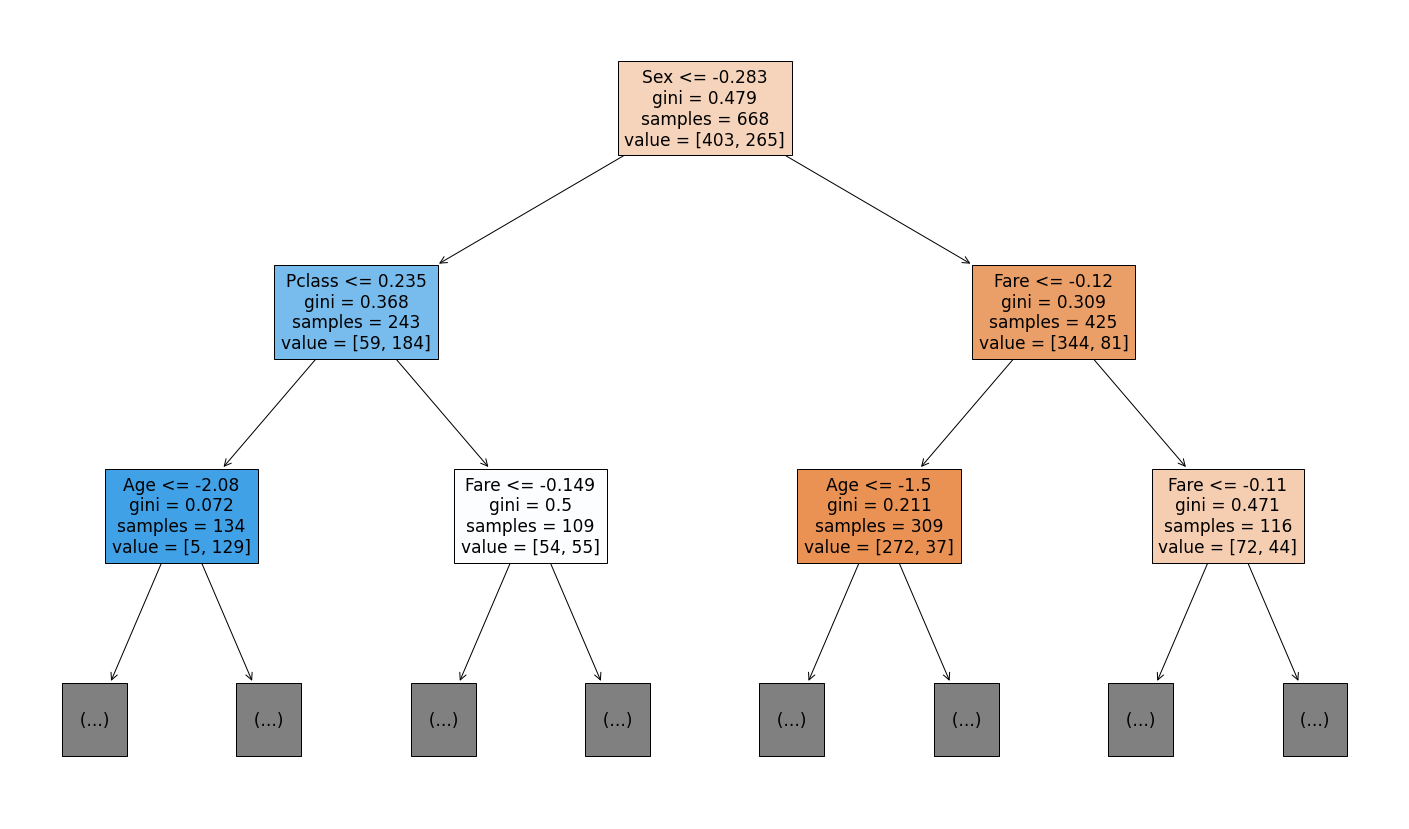

In [101]:
print('훈련세트:',dt.score(train_scaled,train_target))
print('테스트 세트:',dt.score(test_scaled,test_target))
plt.figure(figsize=(25,15))
plot_tree(dt,filled=True,max_depth=2,feature_names=['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked'])
plt.show()

In [102]:
print(dt.predict(finaltest))

[0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0
 0 0 1 1 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 0 1 1 0 0 1 0 0 0]
